In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as st
import statsmodels.api as sm
plt.style.use('fivethirtyeight')
plt.rc('figure', figsize=(10.0, 8.0))

In [21]:
report_all = pd.read_csv("../reportREG.csv", sep = "," , decimal=".")
report = report_all[report_all["exceptions"] != True].copy()
report["hyperplane%"] = report["hyperplane_budget"]/ report["points"]
report

,heuristic,points,hyperplane_budget,jaccard_index,time,exceptions,regularity,hyperplane%
0,CuttingLargerAngle2,4,3,0.580178,2420290.0,False,51,0.750000
1,DistanceFromG,4,3,0.580228,1640691.0,False,51,0.750000
2,CuttingEdges,4,3,0.867872,251233.0,False,51,0.750000
3,LessArea,4,3,0.867872,3730141.0,False,51,0.750000
4,CuttingLargerAngle2,4,3,0.899552,134690.0,False,53,0.750000
...,...,...,...,...,...,...,...,...
4415,LessArea,24,14,0.955077,8842694.0,False,66,0.583333
4416,CuttingLargerAngle2,24,15,0.993731,38650.0,False,66,0.625000
4417,DistanceFromG,24,15,0.951272,787255.0,False,66,0.625000
4418,CuttingEdges,24,15,0.997693,40436.0,False,66,0.625000


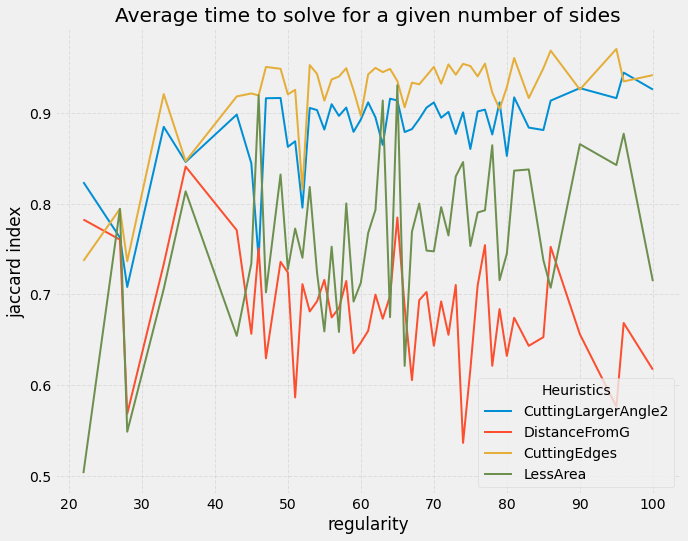

In [23]:
heuristics = report["heuristic"].unique().tolist()

for h in heuristics:
    selected = report[report["heuristic"] == h]
    y = selected.groupby("regularity")
    plt.plot(y["regularity"].unique(), y["jaccard_index"].mean(), linewidth = 2, label=h)

plt.xlabel('regularity')
plt.ylabel('jaccard index')
plt.legend(title='Heuristics')
plt.title('Average time to solve for a given number of sides')
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()